# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [90]:
sinasc_raw = pd.read_csv('sinasc_ro_2019.csv')

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [91]:
# Criando um dataframe com as colunas que serão usadas nas análises

sinasc_v1 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]

In [92]:
media_idade = sinasc_v1.groupby('munResNome').mean()
print(media_idade)

                            IDADEMAE   IDADEPAI
munResNome                                     
Alta Floresta D'Oeste      25.991826  29.548701
Alto Alegre dos Parecis    24.844156  29.179104
Alto Paraíso               24.960177  28.833333
Alvorada D'Oeste           25.770732  30.757282
Ariquemes                  25.607866  32.466667
Buritis                    25.559177  30.812500
Cabixi                     26.037500  34.333333
Cacaulândia                25.546667  36.333333
Cacoal                     26.890102  30.931854
Campo Novo de Rondônia     24.825301  30.500000
Candeias do Jamari         25.243323  29.894737
Castanheiras               27.281250  30.392857
Cerejeiras                 27.240506  31.652778
Chupinguaia                25.333333  29.629630
Colorado do Oeste          27.602804  34.354839
Corumbiara                 24.716535  32.470588
Costa Marques              24.412017  30.613636
Cujubim                    24.482927  31.400000
Espigão D'Oeste            26.093333  31

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [93]:
# Meu aniversário é 09/09
# Criando um dataframe com as colunas que serão usadas nas análises
sinasc_v2 = sinasc_raw[['PESO', 'ESCMAE', 'DTNASC', 'SEXO']]

In [94]:
sinasc_v2 = sinasc_v2[sinasc_v2['DTNASC'] == '2019-09-09']
media_peso = sinasc_v2.groupby(['SEXO', 'ESCMAE'])['PESO'].mean()
print(media_peso)

SEXO       ESCMAE         
Feminino   1 a 3 anos         3780.000000
           12 anos ou mais    3189.266667
           4 a 7 anos         3136.666667
           8 a 11 anos        3267.476190
Masculino  12 anos ou mais    3212.421053
           4 a 7 anos         3343.200000
           8 a 11 anos        3330.695652
Name: PESO, dtype: float64


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [95]:
# Criando um dataframe com as colunas que serão usadas nas análises
sinasc_v3 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]

# Realizando a contagem dos nascimentos por município
sinasc_v3['munResNome'].value_counts()

Porto Velho                  8437
Ji-Paraná                    2182
Ariquemes                    1729
Vilhena                      1590
Cacoal                       1374
Rolim de Moura                927
Jaru                          881
Guajará-Mirim                 781
Ouro Preto do Oeste           631
Pimenta Bueno                 616
Buritis                       583
Machadinho D'Oeste            500
Espigão D'Oeste               450
Nova Mamoré                   432
Alta Floresta D'Oeste         367
São Miguel do Guaporé         353
Candeias do Jamari            337
Presidente Médici             304
São Francisco do Guaporé      303
Nova Brasilândia D'Oeste      261
Cerejeiras                    237
Costa Marques                 233
Alto Paraíso                  226
Colorado do Oeste             214
Alvorada D'Oeste              205
Cujubim                       205
Monte Negro                   199
Urupá                         170
Seringueiras                  168
Campo Novo de 

##### O município com menos nascimentos, ignorando o "Município ignorado - RO", foi o de Castanheiras.

In [96]:
media_idade_cast = sinasc_v3.groupby(["munResNome"]).get_group("Castanheiras").mean()
idade_max_cast = sinasc_v3.groupby(["munResNome"]).get_group("Castanheiras").max()
idade_min_cast = sinasc_v3.groupby(["munResNome"]).get_group("Castanheiras").min()

print(media_idade_cast)
print(idade_max_cast)
print(idade_min_cast)

IDADEMAE    27.281250
IDADEPAI    30.392857
dtype: float64
munResNome    Castanheiras
IDADEMAE                39
IDADEPAI              43.0
dtype: object
munResNome    Castanheiras
IDADEMAE                17
IDADEPAI              17.0
dtype: object


C:\Users\rafa_\AppData\Local\Temp\ipykernel_1968\2541315545.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_idade_cast = sinasc_v3.groupby(["munResNome"]).get_group("Castanheiras").mean()


### 4. Qual o municipio que nasceu mais bebes no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [97]:
# Convertendo os valores presentes em 'DTNASC' para o tipo datetime
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

# Criando um dataframe com as colunas que serão usadas nas análises
sinasc_v4 = sinasc_raw[['DTNASC','IDADEMAE','IDADEPAI','munResNome','QTDFILVIVO']]

# Contando os nascimentos no mês de março em cada município
nasc_marco = sinasc_v4[sinasc_v4['DTNASC'].dt.month == 3].groupby(sinasc_v4['DTNASC'].dt.month)['munResNome'].value_counts()

print(nasc_marco)

DTNASC  munResNome               
3       Porto Velho                  744
        Ji-Paraná                    188
        Vilhena                      148
        Ariquemes                    141
        Cacoal                       133
        Jaru                          80
        Guajará-Mirim                 75
        Rolim de Moura                69
        Ouro Preto do Oeste           67
        Pimenta Bueno                 62
        Buritis                       59
        Nova Mamoré                   53
        Espigão D'Oeste               44
        Machadinho D'Oeste            44
        São Miguel do Guaporé         41
        Candeias do Jamari            33
        Alta Floresta D'Oeste         31
        São Francisco do Guaporé      31
        Presidente Médici             29
        Costa Marques                 24
        Alto Paraíso                  22
        Alvorada D'Oeste              22
        Monte Negro                   20
        Nova Brasilândi

In [98]:
# Qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
# Crio um objeto que realiza a separação das linhas com o município supracitado como com mais nascimentos e utilizo o operador & para utilizar somente os nascimentos em março. Após isso faço o
# agrupamento pela data e faço as quantidades de média, máximo e mínimo de filhos vivos

med_max_min = sinasc_v4[(sinasc_v4['munResNome'] == 'Porto Velho') & (sinasc_v4['DTNASC'].dt.month == 3)].groupby(sinasc_v4['DTNASC'].dt.month)['QTDFILVIVO'].agg(['mean', 'max', 'min'])

print(med_max_min)

            mean  max  min
DTNASC                    
3       1.295056  9.0  0.0


In [99]:
# Crio um objeto que realiza a separação das linhas com o município supracitado como com mais nascimentos e utilizo o operador & para utilizar somente os nascimentos em março. Após isso faço o
# agrupamento pela data e faço as média, máximo e mínimo da idades dos pais.

idade_med_max_min = sinasc_v4[(sinasc_v4['munResNome'] == 'Porto Velho') & (sinasc_v4['DTNASC'].dt.month == 3)].groupby(sinasc_v4['DTNASC'].dt.month)[['IDADEMAE','IDADEPAI']].agg(['mean', 'max', 'min'])
print(idade_med_max_min)

         IDADEMAE           IDADEPAI            
             mean max min       mean   max   min
DTNASC                                          
3       26.596774  44  14  34.629032  62.0  19.0


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

Na última análise, onde verificamos as idades minima e máxima dos pais no município de Porto Velho, capital de Rondonia. É possível perceber que a idade minima da mãe é bem menor do que 18 anos, idade que existe a maioridade pela legislação. O que dependendo da situação póde configurar alguns tipos de abuso, pois a menor idade registrada de algum pai foi de 19 anos.

### Irei analisar as correlações de peso e APGAR5 com as consultas para verificar se existem uma melhora de peso do recem nascido com o acompanhamento médico.

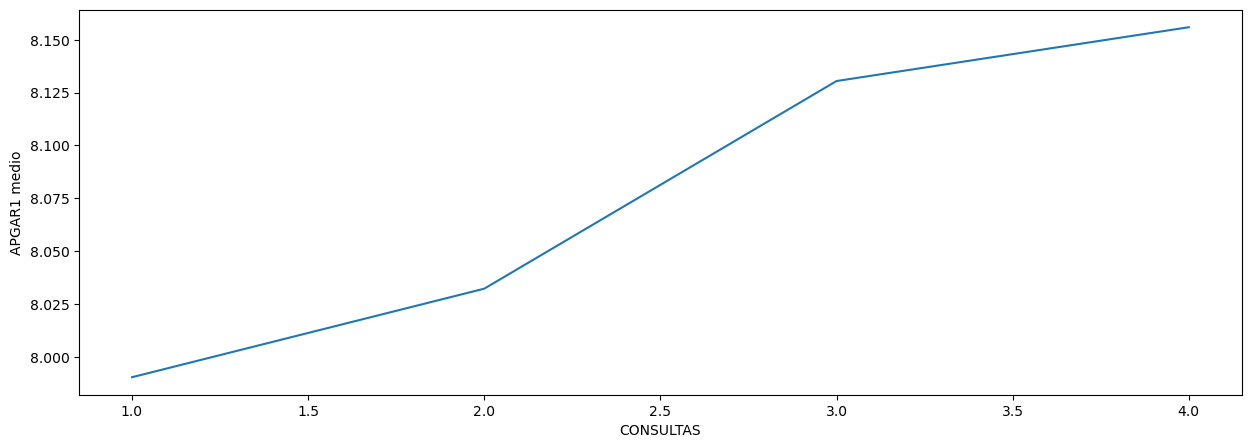

In [100]:
# Separar um dataframe com as variaveis a serem analisadas

sinasc_analise = sinasc_raw[['CONSULTAS','ESCMAE','APGAR1','APGAR5','PESO']].dropna()
sinasc_analise_drop = sinasc_analise.drop(sinasc_analise[sinasc_analise['CONSULTAS'] == 9].index)

# Gráfico de peso vs. APGAR1
sinasc_analise_drop.groupby('CONSULTAS')['APGAR1'].mean().sort_values().plot(figsize=[15,5])
plt.ylabel('APGAR1 medio')
plt.xlabel('CONSULTAS');

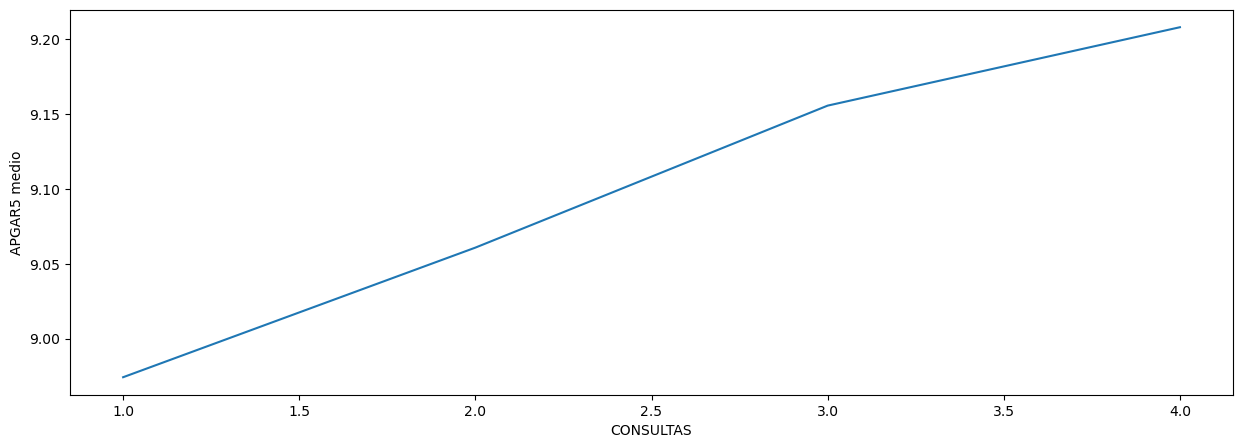

In [101]:
sinasc_analise_drop.groupby('CONSULTAS')['APGAR5'].mean().sort_values().plot(figsize=[15,5])
plt.ylabel('APGAR5 medio')
plt.xlabel('CONSULTAS');

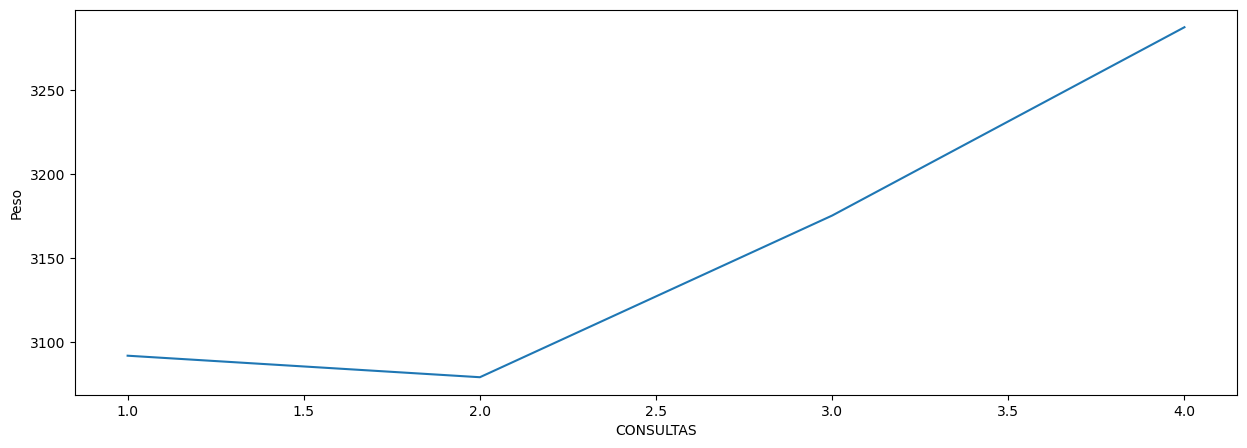

In [104]:
sinasc_analise_drop.groupby('CONSULTAS')['PESO'].mean().plot(figsize=[15,5])
plt.ylabel('Peso')
plt.xlabel('CONSULTAS');

#### É possível observar que tanto o APGAR1 e APGAR5 aumentam muito conforme são feitas mais consultas. Também podemos inferir que o peso, um fator determinante para o desenvolvimento do feto, crese conforme mais consultas foram sendo realizadas.
#### Isso denota a importância do acompanhamento médico da gravidez.